## Logistic Regression with penalty

In [1]:
import numpy as np
import pandas as pd

In [33]:
df = pd.read_csv('patients101.csv')
X = df[['age','totalchol','sysBP','weight','height']]
y = df['gender']
df.head()

,age,totalchol,sysBP,weight,height,sedmins,obese,marriage,gender
0,52,193,128,92.300003,152.1,60,obese,other,F
1,63,194,112,71.099998,151.7,300,obese,married,F
2,48,225,128,58.099998,162.9,480,normal,divorced,F
3,21,145,106,79.800003,170.0,120,overweight,married,M
4,66,224,124,116.200000,160.0,480,obese,widowed,F


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
C = [100,10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear',max_iter=500)
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')

C: 100
Coefficient of each feature: [[ 0.01232554  0.00290189 -0.00150504  0.00757605  0.21101757]]
Training accuracy: 0.825
Test accuracy: 0.9

C: 10
Coefficient of each feature: [[ 0.01246809  0.00129636 -0.00469697  0.0090723   0.17908117]]
Training accuracy: 0.8125
Test accuracy: 0.9

C: 1
Coefficient of each feature: [[ 0.0078503  -0.0088994  -0.02347107  0.02193238  0.03101687]]
Training accuracy: 0.625
Test accuracy: 0.45

C: 0.1
Coefficient of each feature: [[ 0.00222693 -0.00964977 -0.02044225  0.0210727   0.01499966]]
Training accuracy: 0.5625
Test accuracy: 0.45

C: 0.001
Coefficient of each feature: [[0. 0. 0. 0. 0.]]
Training accuracy: 0.55
Test accuracy: 0.45



In [27]:
clf = LogisticRegression(penalty='l1', C=100, solver='liblinear',max_iter=500)
clf.fit(X_train, y_train)
# predict class labels for X_test
y_predict = clf.predict(X_test)
print(y_predict)


['M' 'M' 'F' 'M' 'M' 'F' 'F' 'F' 'F' 'F' 'F' 'M' 'M' 'M' 'M' 'M' 'F' 'F'
 'M' 'M']


In [28]:
# get probability estimates
print(clf.predict_proba(X_test))

[[0.03349717 0.96650283]
 [0.34902409 0.65097591]
 [0.77575793 0.22424207]
 [0.06089119 0.93910881]
 [0.01984058 0.98015942]
 [0.9447032  0.0552968 ]
 [0.65666215 0.34333785]
 [0.66456824 0.33543176]
 [0.67681237 0.32318763]
 [0.82888616 0.17111384]
 [0.65855171 0.34144829]
 [0.43532857 0.56467143]
 [0.10687769 0.89312231]
 [0.12656403 0.87343597]
 [0.31105296 0.68894704]
 [0.33138799 0.66861201]
 [0.84816693 0.15183307]
 [0.97803116 0.02196884]
 [0.3260018  0.6739982 ]
 [0.35744298 0.64255702]]


In [29]:
# get coefficients
print(clf.coef_)

[[ 0.0123239   0.00290931 -0.00149133  0.00756387  0.21120867]]


In [30]:
# return misclassfication rate
print(1-clf.score(X_test, y_test))

0.09999999999999998


In [51]:
X = df[['age','sysBP','weight','height']]
y = df['totalchol']

## Lasso

In [63]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)


In [54]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = linear_model.Lasso()
ridge = linear_model.Ridge()
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
gridridge = GridSearchCV(ridge, parameters, scoring ='r2')


In [55]:
gridlasso.fit(X_train, y_train)
gridridge.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. ,
       24. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [57]:
print("ridge best parameters:", gridridge.best_params_)
print("lasso best parameters:", gridlasso.best_params_)
print("ridge score:", gridridge.score(X_test, y_test))
print("lasso score:", gridlasso.score(X_test, y_test))
print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test)))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("ridge best estimator coef:", gridridge.best_estimator_.coef_)
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)


ridge best parameters: {'alpha': 24.0}
lasso best parameters: {'alpha': 7.0}
ridge score: -0.2873676166382164
lasso score: -0.2583225292462681
ridge MSE: 2056.1159704946863
lasso MSE: 2009.726681779354
ridge best estimator coef: [-1.26520007e-01 -3.29152211e-04  2.08112666e-01 -1.01687890e+00]
lasso best estimator coef: [-0.0950309  -0.          0.16691871 -0.91296042]


In [58]:
from sklearn.linear_model import lars_path


In [62]:
X = np.array(X)
y = np.array(y)
larper = lars_path(X,y,method="lasso")


Text(0.5, 1.0, 'Lasso Paths')

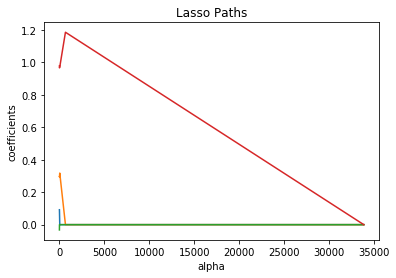

In [66]:
for j in range(larper[2].shape[0]):
    plt.plot(larper[0],larper[2][j,:])
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso Paths')